### Smoothing Exercise
create a universe of stocks of QTradableStocksUS from the following website

https://www.quantopian.com/posts/working-on-our-best-universe-yet-qtradablestocksus

In [2]:
# Imports
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors.morningstar import MarketCap
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import time

from quantopian.pipeline.experimental import QTradableStocksUS

### Pipeline constuction using QTradableStocks as a Screen

In [3]:
def make_pipeline():
    
    average_day_dv_200 = AverageDollarVolume(window_length = 200)
    market_cap = Fundamentals.market_cap.latest
    price = USEquityPricing.close.latest
    volume = USEquityPricing.volume.latest
    sector = Sector()
    
    # Ranked REturn
    returns = Returns (window_length = 252)
    ranked_returns = returns.rank()
    
    #New Facotrs
    #create a factor of 1 year returns, demeaned by sector, rank, zscore
    factor = (
    Returns(window_length = 252).\
    demean(groupby = Sector()).\
    rank().\
    zscore()
    )
    
    # use the newly created factor as an input into SimpleMovingAverage, with a window length of 5 days
    # also rank and zscore (dont need to demean the sector)
    factor_smoothed = (
    SimpleMovingAverage(inputs = [factor], window_length=5).\
        rank().\
        zscore()
    )
    
    return Pipeline(
        columns = {
            'AverageDollarVolume200':average_day_dv_200,
            'MarketCap':market_cap,
            'Price':price,
            'Volume':volume,
            'Sector':sector,
            '1yrReturns':factor,
            '5dAvgReturns': factor_smoothed,
            'ranked_return': ranked_returns
        },
        screen = QTradableStocksUS()
    )

In [4]:
# Pipeline is run over this time range and outputs a dataframe indexed by asset name:
START_DATE = '2017'
END_DATE = '2019-07-31'

QTU_pipeline2 = run_pipeline(make_pipeline(), START_DATE, END_DATE, chunksize = 252)

In [6]:
# lets see what stocks had the most gains ytd through july 31
leading_stocks = QTU_pipeline2.sort_values(by=['ranked_return'], ascending = False)
leading_stocks.filter(like='2019-07-31', axis = 0).head(25)

1yrReturns  5dAvgReturns  \
2019-07-31 00:00:00+00:00 Equity(49607 [AXSM])    1.729182      1.729251   
                          Equity(32726 [EHTH])    1.722168      1.722408   
                          Equity(42749 [ENPH])    1.717705      1.715564   
                          Equity(50477 [IIPR])    1.717067      1.716808   
                          Equity(48628 [NVTA])    1.715154      1.713075   
                          Equity(50411 [RARX])    1.713879      1.716186   
                          Equity(50288 [TTD])     1.709416      1.706854   
                          Equity(50735 [AYX])     1.707503      1.706232   
                          Equity(44991 [NSTG])    1.708778      1.708720   
                          Equity(50449 [INSG])    1.704315      1.702499   
                          Equity(47321 [CDNA])    1.706228      1.704365   
                          Equity(45758 [VCYT])    1.703677      1.705610   
                          Equity(31341 [ZIOP])    1.702402      1.692545   
                          Equity(50758 [OKTA])    1.696664      1.690056   
                          Equity(45852 [TNDM])    1.701127      1.695655   
                          Equity(45429 [FATE])    1.700489      1.696278   
                          Equity(51314 [MDB])     1.691563      1.694411   
                          Equity(49460 [NVCR])    1.697301      1.681968   
                          Equity(51961 [SMAR])    1.685187      1.686323   
                          Equity(50077 [TWLO])    1.681999      1.682590   
                          Equity(51231 [ROKU])    1.688375      1.683212   
                          Equity(51806 [CRON])    1.689013      1.693789   
                          Equity(51832 [ZS])      1.679449      1.674502   
                          Equity(48254 [WK])      1.678173      1.678235   
                          Equity(49275 [RPD])     1.676261      1.663304   

                                                AverageDollarVolume200  \
2019-07-31 00:00:00+00:00 Equity(49607 [AXSM])            1.526011e+07   
                          Equity(32726 [EHTH])            2.151845e+07   
                          Equity(42749 [ENPH])            2.376435e+07   
                          Equity(50477 [IIPR])            2.421685e+07   
                          Equity(48628 [NVTA])            2.330941e+07   
                          Equity(50411 [RARX])            7.286931e+06   
                          Equity(50288 [TTD])             1.988526e+08   
                          Equity(50735 [AYX])             6.377491e+07   
                          Equity(44991 [NSTG])            7.346490e+06   
                          Equity(50449 [INSG])            3.447863e+06   
                          Equity(47321 [CDNA])            1.825660e+07   
                          Equity(45758 [VCYT])            8.855138e+06   
                          Equity(31341 [ZIOP])            5.882152e+06   
                          Equity(50758 [OKTA])            1.347215e+08   
                          Equity(45852 [TNDM])            7.246655e+07   
                          Equity(45429 [FATE])            8.962365e+06   
                          Equity(51314 [MDB])             1.292754e+08   
                          Equity(49460 [NVCR])            2.635175e+07   
                          Equity(51961 [SMAR])            3.966584e+07   
                          Equity(50077 [TWLO])            3.935828e+08   
                          Equity(51231 [ROKU])            6.508352e+08   
                          Equity(51806 [CRON])            1.508152e+08   
                          Equity(51832 [ZS])              9.435412e+07   
                          Equity(48254 [WK])              8.695085e+06   
                          Equity(49275 [RPD])             1.853599e+07   

                                                   MarketCap    Price  Sector  \
2019-07-31 00:00:00+00:00 Equity(49607 [AXSM])  8.755966e+08   26

### create datafreme with momentum factors

In [7]:
df = QTU_pipeline2[['1yrReturns', '5dAvgReturns']]
df.head()

1yrReturns  5dAvgReturns
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])    -1.663162     -1.694499
                          Equity(24 [AAPL])    0.242636      0.270176
                          Equity(31 [ABAX])    0.731982      0.638386
                          Equity(41 [ARCB])    0.571808      0.623764
                          Equity(52 [ABM])     1.027217      0.888291

### Evaluate Factors
We'll go over some tools we can use to evaluate alpha factors, to do so we will use the alphalens library

### Import Alphalens

In [8]:
import alphalens as al

### create new dataframe with just the prices

In [9]:
stock_prices = QTU_pipeline2.Price.unstack().fillna(0)
stock_prices.head()

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(31 [ABAX]),Equity(39 [DDC]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),...,Equity(52525 [REZI]),Equity(52529 [ACA]),Equity(52537 [STNE]),Equity(52548 [TWST]),Equity(52553 [SWI]),Equity(52571 [YETI]),Equity(52586 [CCC]),Equity(52592 [LIN]),Equity(52594 [ETRN]),Equity(52603 [APHA])
2017-01-03 00:00:00+00:00,18.55,115.84,52.74,0.0,27.75,40.68,112.70,38.42,15.990,74.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04 00:00:00+00:00,19.19,116.14,53.57,0.0,28.85,40.82,112.37,39.03,16.400,76.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05 00:00:00+00:00,19.69,116.02,53.40,0.0,29.10,41.45,115.74,39.30,16.395,77.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06 00:00:00+00:00,20.09,116.61,52.61,0.0,28.30,40.58,114.71,39.70,17.380,76.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09 00:00:00+00:00,20.70,117.91,53.59,0.0,28.40,39.79,115.33,40.78,16.920,79.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Prepare data for use in alphalens

In [10]:
factor_names = df.columns

# use a dictionary to store each dataframe, one for each factor and it associated foward return
factor_data = {}

for factor_name in factor_names:
    print("formating factor data for: " + factor_name)
    # Todo: get clean factor and forward returns for each factor
    # choose a single period returns (daily returns)
    
    factor_data[factor_name] = al.utils.get_clean_factor_and_forward_returns(
        factor = df[factor_name],
        prices = stock_prices,
        periods = [1]
    )
        

formating factor data for: 1yrReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
formating factor data for: 5dAvgReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


### Factor Returns
What are factor-weighted returns? we may also refer to this as "factor returns".

If you created a theoretical portfolio in which the weights for each stock were chosen based on the factor scroes ( the z-scores we calculated earlier), then we could calculated the daily returns of that theoretical portfolio.

The returns of this portfolio, in which its weights were determined by the alpha factor, are called the"factor-weighted returns" and also referred to as "factor returns"

### Alphalens factor_returns

Alphalens has a function that calculates the factor returns, called alphalens.performance.factor_returns.  The [documentation is here](https://quantopian.github.io/alphalens/alphalens.html?highlight=factor_returns#alphalens.performance.factor_returns).  

```
Computes period wise returns for portfolio weighted by factor values.

Parameters:	
factor_data : pd.DataFrame - MultiIndex

A MultiIndex DataFrame indexed by date (level 0) and asset (level 1), containing the values for a single alpha factor, forward returns for each period, the factor quantile/bin that factor value belongs to, and (optionally) the group the asset belongs to. - See full explanation in utils.get_clean_factor_and_forward_returns

demeaned : bool

Control how to build factor weights – see performance.factor_weights for a full explanation

group_adjust : bool

Control how to build factor weights – see performance.factor_weights for a full explanation

equal_weight : bool, optional

Control how to build factor weights – see performance.factor_weights for a full explanation

by_asset: bool, optional

If True, returns are reported separately for each asset.```


* factor_data: We'll pass in the pre-processed dataframe that we got back from the previous alphalens function.
* returns: the return of a theoretical portfolio that is weighted according to the factor.  This is the factor-weighted return, also called the factor return.

### Quiz 1 
calculate factor returns for each factor

In [11]:
ls_factor_return = []

for i, facotr_name in enumerate(factor_name):
    #ToDo: use alphalens function "factor_returns" to calculate factor returns
    # on each factor within the factor_data dictionary
    factor_return = al.performance.factor_returns(factor_data[factor_name])
    factor_return.columns = [factor_name]
    ls_factor_return.append(factor_return)

### Inspect factor returns

In [12]:
ls_factor_return[0][0:5]

,5dAvgReturns
date,
2017-01-03 00:00:00+00:00,-0.005389
2017-01-04 00:00:00+00:00,-0.000991
2017-01-05 00:00:00+00:00,-0.000258
2017-01-06 00:00:00+00:00,-0.000175
2017-01-09 00:00:00+00:00,0.002440


In [13]:
ls_factor_return[1][0:5]

,5dAvgReturns
date,
2017-01-03 00:00:00+00:00,-0.005389
2017-01-04 00:00:00+00:00,-0.000991
2017-01-05 00:00:00+00:00,-0.000258
2017-01-06 00:00:00+00:00,-0.000175
2017-01-09 00:00:00+00:00,0.002440


In [14]:
unsmoothed_factor_return = ls_factor_return[0]
smoothed_factor_return = ls_factor_return[1]

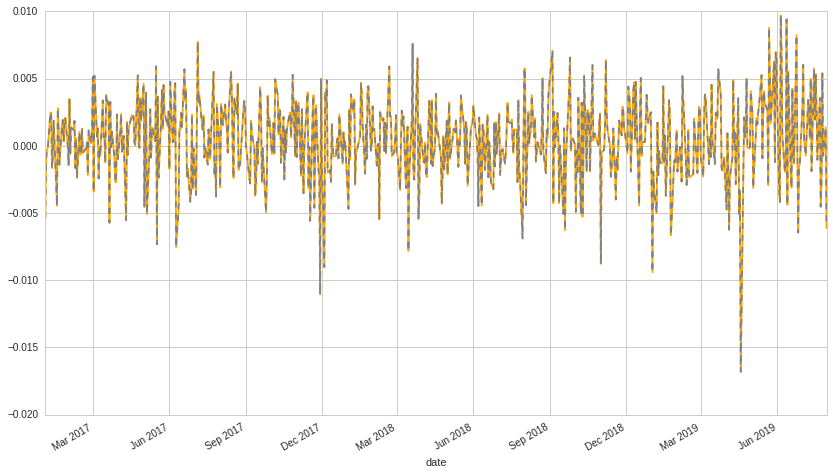

In [15]:
unsmoothed_factor_return['5dAvgReturns'].plot(color='orange')
smoothed_factor_return['5dAvgReturns'].plot(color = 'gray', style = '--')

In [16]:
df.head()

1yrReturns  5dAvgReturns
date                      asset                                      
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])    -1.663162     -1.694499
                          Equity(24 [AAPL])    0.242636      0.270176
                          Equity(31 [ABAX])    0.731982      0.638386
                          Equity(41 [ARCB])    0.571808      0.623764
                          Equity(52 [ABM])     1.027217      0.888291

### Quiz 1: Sharpe Ratio
Generally, a shpare ratio of 1 or higher indicates a better factor than one with a lower Sharpe ratio. In other words, the returns that would have been accrued by a portfolio that was weighted according to the alpha factor would have had an anualized return that is greater or equal to its annualized volatility

Recall taht the annualized the Sharpe Ratio (form daily to annual), $\sqrt{252}$

In [22]:
def sharpe_ratio(df, frequency = "daily"):
    
    if frequency == 'daily':
        # Todo: daily t annual conversion
        annualization_factor = np.sqrt(252)
    elif frequency == "monthly":
        # todo: monthly to annual conversion
        annualization_factor = np.sqrt(12)
    else:
        #todo: no conversion
        annualization_factor = 1
        
    # todo: calculate the sharpe rtion and store it in a dataframe.
    # rename the column "sharpe_ratio"
    # round th numbers to 2 decimal places
    df_sharpe = pd.DataFrame(data = annualization_factor*df.mean()/df.std(),
                            columns = ['sharpe_ratio']).round(2)
    
    return df_sharpe

In [23]:
sharpe_ratio(ls_factor_return[0])

,sharpe_ratio
5dAvgReturns,2.65


In [24]:
sharpe_ratio(ls_factor_return[1])

,sharpe_ratio
5dAvgReturns,2.65
